In [2]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("test.csv")
df

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km?),Density (P/Km?)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797,27400.0,105
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044,2381740.0,18
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265,470.0,164
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272,1246700.0,26
...,...,...,...,...,...,...,...,...,...
3529,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep ...",negative,noon,21-30,Nicaragua,6624554,120340.0,55
3530,416863ce47,All alone in this old house again. Thanks for...,positive,night,31-45,Niger,24206644,1266700.0,19
3531,6332da480c,I know what you mean. My little dog is sinkin...,negative,morning,46-60,Nigeria,206139589,910770.0,226
3532,df1baec676,_sutra what is your next youtube video gonna b...,positive,noon,60-70,North Korea,25778816,120410.0,214


In [4]:
if 'text' in df.columns:
    df.rename(columns={'text': 'verified_reviews', 'sentiment': 'feedback'}, inplace=True)

In [5]:
feedbacks = df[df['feedback'].isin(['positive', 'negative'])]
feedbacks


,textID,verified_reviews,feedback,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km?),Density (P/Km?)
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797,27400.0,105
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044,2381740.0,18
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265,470.0,164
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272,1246700.0,26
5,726e501993,that`s great!! weee!! visitors!,positive,night,70-100,Antigua and Barbuda,97929,440.0,223
...,...,...,...,...,...,...,...,...,...
3529,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep ...",negative,noon,21-30,Nicaragua,6624554,120340.0,55
3530,416863ce47,All alone in this old house again. Thanks for...,positive,night,31-45,Niger,24206644,1266700.0,19
3531,6332da480c,I know what you mean. My little dog is sinkin...,negative,morning,46-60,Nigeria,206139589,910770.0,226
3532,df1baec676,_sutra what is your next youtube video gonna b...,positive,noon,60-70,North Korea,25778816,120410.0,214


In [6]:
df['feedback'] = df['feedback'].map({'positive': 1, 'negative': 0})

In [7]:
df

,textID,verified_reviews,feedback,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km?),Density (P/Km?)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,NaN,morning,0-20,Afghanistan,38928346,652860.0,60
1,96d74cb729,Shanghai is also really exciting (precisely -...,1.0,noon,21-30,Albania,2877797,27400.0,105
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",0.0,night,31-45,Algeria,43851044,2381740.0,18
3,01082688c6,happy bday!,1.0,morning,46-60,Andorra,77265,470.0,164
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,1.0,noon,60-70,Angola,32866272,1246700.0,26
...,...,...,...,...,...,...,...,...,...
3529,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep ...",0.0,noon,21-30,Nicaragua,6624554,120340.0,55
3530,416863ce47,All alone in this old house again. Thanks for...,1.0,night,31-45,Niger,24206644,1266700.0,19
3531,6332da480c,I know what you mean. My little dog is sinkin...,0.0,morning,46-60,Nigeria,206139589,910770.0,226
3532,df1baec676,_sutra what is your next youtube video gonna b...,1.0,noon,60-70,North Korea,25778816,120410.0,214


In [8]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 textID                 0
verified_reviews       0
feedback            1430
Time of Tweet          0
Age of User            0
Country                0
Population -2020       0
Land Area (Km?)        0
Density (P/Km?)        0
dtype: int64


In [9]:
df.reset_index(drop=True, inplace=True)

In [10]:
df

,textID,verified_reviews,feedback,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km?),Density (P/Km?)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,NaN,morning,0-20,Afghanistan,38928346,652860.0,60
1,96d74cb729,Shanghai is also really exciting (precisely -...,1.0,noon,21-30,Albania,2877797,27400.0,105
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",0.0,night,31-45,Algeria,43851044,2381740.0,18
3,01082688c6,happy bday!,1.0,morning,46-60,Andorra,77265,470.0,164
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,1.0,noon,60-70,Angola,32866272,1246700.0,26
...,...,...,...,...,...,...,...,...,...
3529,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep ...",0.0,noon,21-30,Nicaragua,6624554,120340.0,55
3530,416863ce47,All alone in this old house again. Thanks for...,1.0,night,31-45,Niger,24206644,1266700.0,19
3531,6332da480c,I know what you mean. My little dog is sinkin...,0.0,morning,46-60,Nigeria,206139589,910770.0,226
3532,df1baec676,_sutra what is your next youtube video gonna b...,1.0,noon,60-70,North Korea,25778816,120410.0,214


In [11]:
df['feedback'] = df['feedback'].fillna(0).astype(int)

In [12]:
df

,textID,verified_reviews,feedback,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km?),Density (P/Km?)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,0,morning,0-20,Afghanistan,38928346,652860.0,60
1,96d74cb729,Shanghai is also really exciting (precisely -...,1,noon,21-30,Albania,2877797,27400.0,105
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",0,night,31-45,Algeria,43851044,2381740.0,18
3,01082688c6,happy bday!,1,morning,46-60,Andorra,77265,470.0,164
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,1,noon,60-70,Angola,32866272,1246700.0,26
...,...,...,...,...,...,...,...,...,...
3529,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep ...",0,noon,21-30,Nicaragua,6624554,120340.0,55
3530,416863ce47,All alone in this old house again. Thanks for...,1,night,31-45,Niger,24206644,1266700.0,19
3531,6332da480c,I know what you mean. My little dog is sinkin...,0,morning,46-60,Nigeria,206139589,910770.0,226
3532,df1baec676,_sutra what is your next youtube video gonna b...,1,noon,60-70,North Korea,25778816,120410.0,214


In [13]:
data = df.drop(['Land Area (Km?)', 'Density (P/Km?)'], axis=1)

In [14]:
data

,textID,verified_reviews,feedback,Time of Tweet,Age of User,Country,Population -2020
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,0,morning,0-20,Afghanistan,38928346
1,96d74cb729,Shanghai is also really exciting (precisely -...,1,noon,21-30,Albania,2877797
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",0,night,31-45,Algeria,43851044
3,01082688c6,happy bday!,1,morning,46-60,Andorra,77265
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,1,noon,60-70,Angola,32866272
...,...,...,...,...,...,...,...
3529,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep ...",0,noon,21-30,Nicaragua,6624554
3530,416863ce47,All alone in this old house again. Thanks for...,1,night,31-45,Niger,24206644
3531,6332da480c,I know what you mean. My little dog is sinkin...,0,morning,46-60,Nigeria,206139589
3532,df1baec676,_sutra what is your next youtube video gonna b...,1,noon,60-70,North Korea,25778816


In [15]:
stemmer = PorterStemmer()
corpus = []

for i in range(len(data)):
    review = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['verified_reviews'])
    review = review.lower().split()
    review = [stemmer.stem(word) for word in review]
    review = ' '.join(review)
    corpus.append(review)

In [16]:
tfidf = TfidfVectorizer(max_features=2500, stop_words='english')
X = tfidf.fit_transform(corpus).toarray()
y = data['feedback'].values

In [17]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
y

array([0, 1, 0, ..., 0, 1, 1])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

In [20]:
scaler = MinMaxScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [21]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scl, y_train)

LogisticRegression(max_iter=1000)

In [22]:
print("Training Accuracy:", model.score(X_train_scl, y_train))
print("Testing Accuracy:", model.score(X_test_scl, y_test))

Training Accuracy: 0.9179134654266073
Testing Accuracy: 0.7935909519321395


In [23]:
y_pred = model.predict(X_test_scl)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[683  33]
 [186 159]]


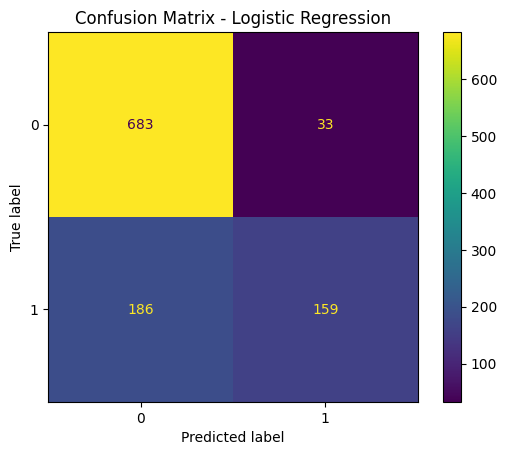

In [24]:

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [25]:
cv_scores = cross_val_score(model, X_train_scl, y_train, cv=10)
print("Cross-Validation Accuracy: {:.2f}%".format(cv_scores.mean() * 100))

Cross-Validation Accuracy: 80.43%


In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.95      0.86       716
           1       0.83      0.46      0.59       345

    accuracy                           0.79      1061
   macro avg       0.81      0.71      0.73      1061
weighted avg       0.80      0.79      0.77      1061

